In [2]:
# Support Vector Machines - Both Regression, Classification and Outlier or
# Anomaly Detection. Predominantly used as Classification algorithm
# SVM will draw a linear seperator on a hyperplane between 2 classes such
# that both the classes are distinctly seperated
# It also draws 2 support vectors on both sides of linear sperator touching
# closest observations of both classes. 
# Algorithm tries to maximize the margin - distance between hyperplane and
# the observations.
# Right Side of Optimal Hyperolane is Positive Hyperplane and left side
# of Optimal Hyperplane is Negative Hyperplane

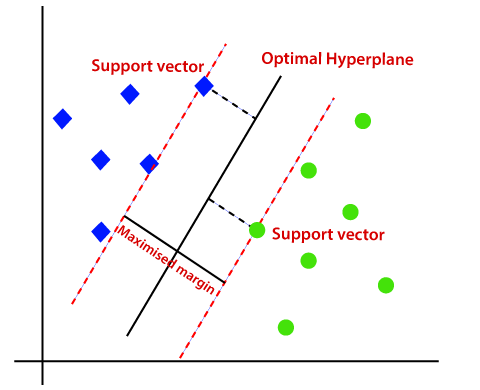

In [3]:
# Vector Arithmetic particularly projection and dot product are used
# Dot Product = A.B =|A|*Costheta*|B|
# where |A|*Costheta is the projection of A on B
# |B| is magnitude of vector B

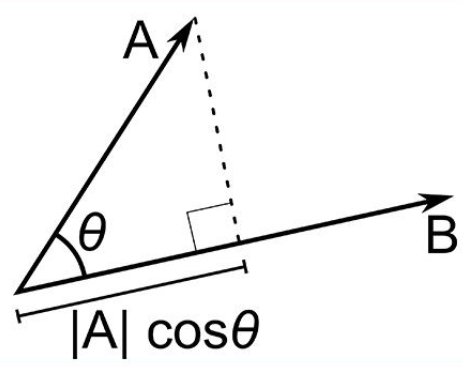

# Decision Rule for SVM is
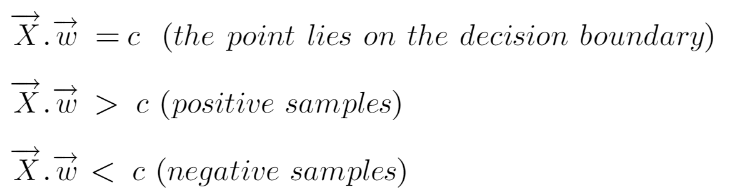
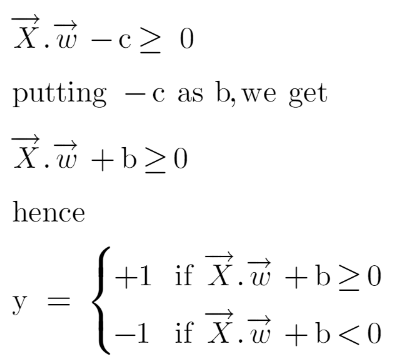

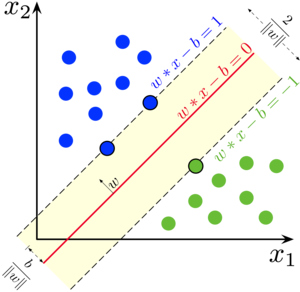

In [4]:
# Most of the realtime data is NonLinear which means data points cannot
# be sepearted into 2 classes by drawing a straight line. 
# Kernel Function generally transforms the training set of data so that a 
# non-linear decision surface is able to transformed to a linear equation 
# in a higher number of dimension spaces. 
# Most used kernel is Radial Basis Function (rbf) - It is a general-purpose
# kernel; used when there is no prior knowledge about the data.

In [5]:
# Hyperbolic tangent(tanh) & Sigmoid Kernel are used in Neural Networks
# Polynomial Kernel is used in Image Processing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import io
%cd "C:\Users\Rajesh\Desktop\Hackathon\H1N1 Vaccine Prediction"

C:\Users\Rajesh\Desktop\Hackathon\H1N1 Vaccine Prediction


In [8]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [9]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [10]:
vaccinelabels=pd.read_csv("training_set_labels.csv")

In [11]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(vaccinelabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [12]:
vaccinetrain.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [13]:
vaccinetest.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

In [14]:
# Missing Value Imputation using KNN Imputer
# KNN is a non parametric algorithm that uses distance like Euclidean to
# calculate distance between missing value and closest 5 neighbors(rows)
# and smallest distance value is imputed.

# Before applying KNN imputer labelencoding of object and categorical data
# must be done

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)# Row Concatenation

In [17]:
stringcols=combinedf.drop(['respondent_id'],axis=1)

In [18]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),
index=series[series.notnull()].index))

In [19]:
from sklearn.impute import KNNImputer

In [21]:
imputer=KNNImputer()

In [22]:
stringcolsimp=imputer.fit_transform(stringcols)

In [23]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [25]:
vaccinetraindf=stringcolsimp.loc[0:26706]

In [26]:
vaccinetestdf=stringcolsimp.loc[26707:53415]

In [27]:
vaccinelabels.seasonal_vaccine.value_counts() # Balanced Data

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [28]:
vaccinelabels.h1n1_vaccine.value_counts() # Imbalanced Data

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [29]:
y=vaccinelabels.seasonal_vaccine
X=vaccinetraindf

In [30]:
# Build Logistic Regression on the data
from sklearn.linear_model import LogisticRegression

In [33]:
logit=LogisticRegression(max_iter=200)

In [34]:
logitmodel=logit.fit(X,y)

In [35]:
logitmodel.score(X,y)

0.7611487624967237

In [36]:
logitpredict=logitmodel.predict(X)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [39]:
y1=vaccinelabels.h1n1_vaccine

In [40]:
logitmodel_h1n1=logit.fit(X,y1) # Model built for h1n1_vaccine prediction

In [41]:
logitmodel_h1n1.score(X,y1)

0.8279102856928895

In [42]:
logitpredict_h1n1=logitmodel_h1n1.predict(X)

In [43]:
print(classification_report(y1,logitpredict_h1n1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.37      0.48      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.66      0.69     26707
weighted avg       0.81      0.83      0.81     26707



In [44]:
# Run using seasonal_vaccine(y)
# DecisionTreeClassifier
# RandomForestClassifier
# GradientBoostingClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree=DecisionTreeClassifier(max_depth=8)

In [53]:
treemodel=tree.fit(X,y)

In [54]:
treemodel.score(X,y)

0.7861983749578763

In [55]:
treepredict=treemodel.predict(X)

In [56]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     14272
           1       0.77      0.77      0.77     12435

    accuracy                           0.79     26707
   macro avg       0.79      0.79      0.79     26707
weighted avg       0.79      0.79      0.79     26707



In [87]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'opinion_seas_vacc_effective <= 3.5\ngini = 0.498\nsamples = 26707\nvalue = [14272, 12435]'),
 Text(0.25, 0.7, 'opinion_seas_risk <= 1.5\ngini = 0.436\nsamples = 16272\nvalue = [11042, 5230]'),
 Text(0.125, 0.5, 'doctor_recc_seasonal <= 0.5\ngini = 0.347\nsamples = 11135\nvalue = [8652, 2483]'),
 Text(0.0625, 0.3, 'age_group <= 3.5\ngini = 0.271\nsamples = 8193\nvalue = [6870, 1323]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'doctor_recc_h1n1 <= 1.5\ngini = 0.478\nsamples = 2942\nvalue = [1782, 1160]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'doctor_recc_seasonal <= 0.5\ngini = 0.498\nsamples = 5137\nvalue = [2390, 2747]'),
 Text(0.3125, 0.3, 'age_group <= 1.5\ngini = 0.49\nsamples = 2953\nvalue = [1690, 1263]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'doctor_recc_h1n1 <= 1.5\ngini = 0.436\nsamples = 2184\n

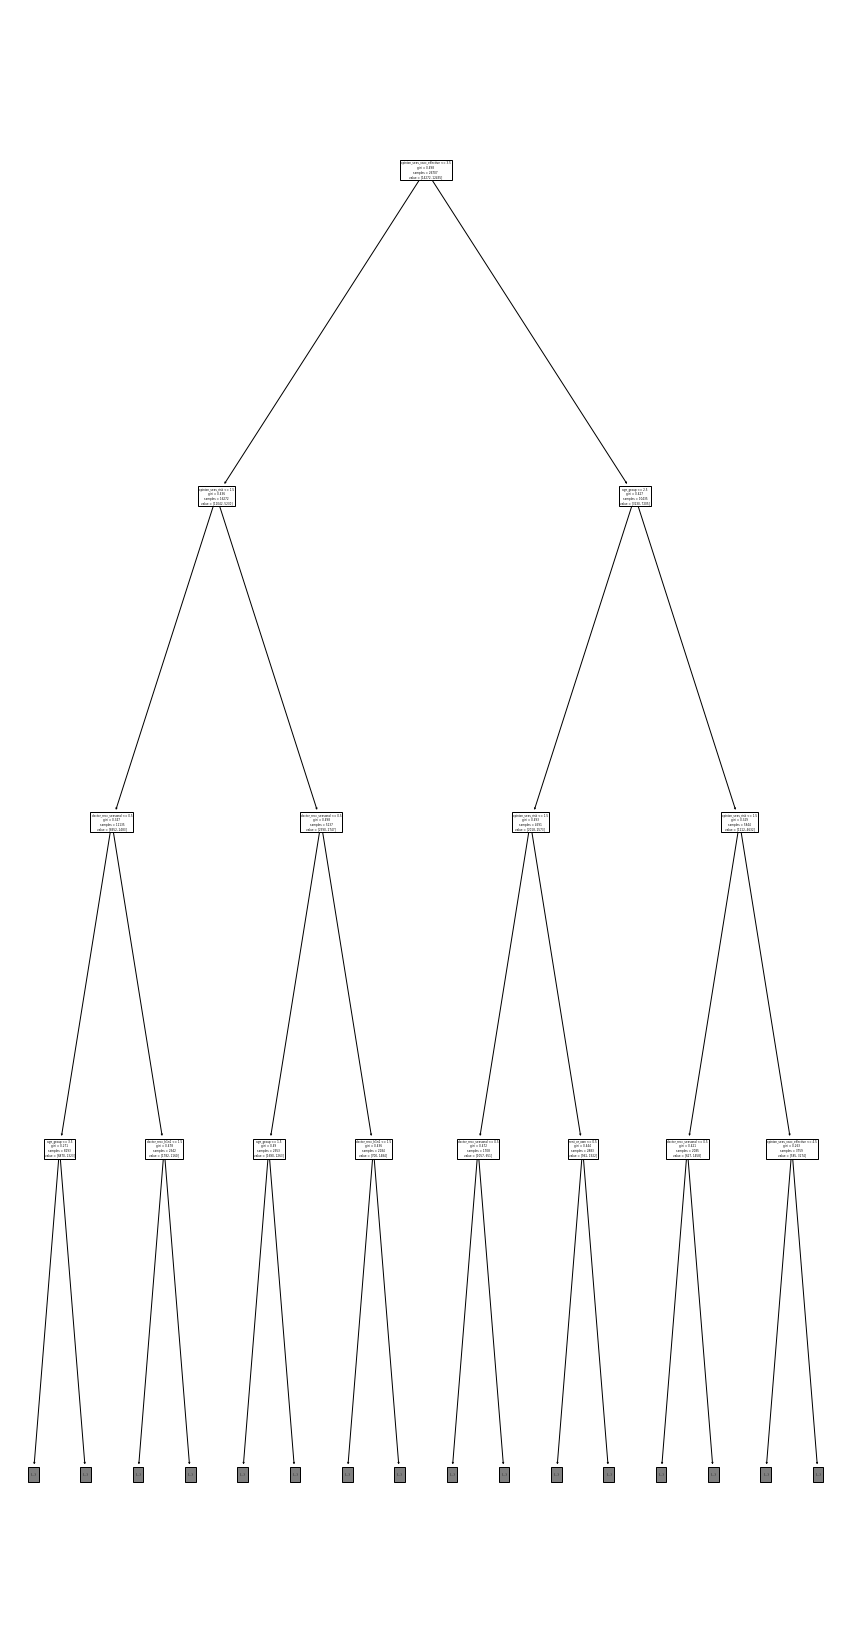

In [93]:
plt.figure(figsize=(15,30))
plot_tree(treemodel,max_depth=3,feature_names=X.columns)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
RF=RandomForestClassifier(3)

In [71]:
RFmodel=RF.fit(X,y)

In [72]:
RFmodel.score(X,y)

0.9437600629048564

In [73]:
RFpredict=RFmodel.predict(X)

In [74]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14272
           1       0.94      0.94      0.94     12435

    accuracy                           0.94     26707
   macro avg       0.94      0.94      0.94     26707
weighted avg       0.94      0.94      0.94     26707



In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [81]:
gbmmodel=gbm.fit(X,y)

In [82]:
gbmmodel.score(X,y)

0.8201595087430261

In [83]:
gbmpredict=gbmmodel.predict(X)

In [84]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14272
           1       0.82      0.79      0.80     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.82      0.82     26707
weighted avg       0.82      0.82      0.82     26707



In [94]:
from sklearn.svm import SVC

In [95]:
svm=SVC()

In [96]:
svmmodel=svm.fit(X,y)

In [97]:
svmmodel.score(X,y)

0.7783352679072902

In [98]:
svmpredict=svmmodel.predict(X)

In [99]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707

